# RISEI Evaluation Comparison

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import numpy as np

from src.heatmaps.evaluation import HeatmapEvaluationHistory

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['image.cmap'] = 'viridis'

%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

In [7]:
history_in_paint = HeatmapEvaluationHistory.load('../../tmp/risei-history', '20201219-121724')
history_in_paint.description()

evaluated heatmaps: 25
auc
	mean:     727,630.5289899185
	median:   649,872.7299496531
	max:    1,279,400.2375602722
	min:     116,972.14367659763
	std:      440,082.1273674378


In [8]:
history_1 = HeatmapEvaluationHistory.load('../../tmp/risei-history', '20201222-151810')
history_1.description()

evaluated heatmaps: 25
auc
	mean:     906,993.2292497623
	median:    934,788.864955306
	max:      1,301,674.67969656
	min:      331,327.3652046919
	std:      312,428.6917478775


error:  3449.080455546934
max_error:  1384448
% 0.0024913037221671987


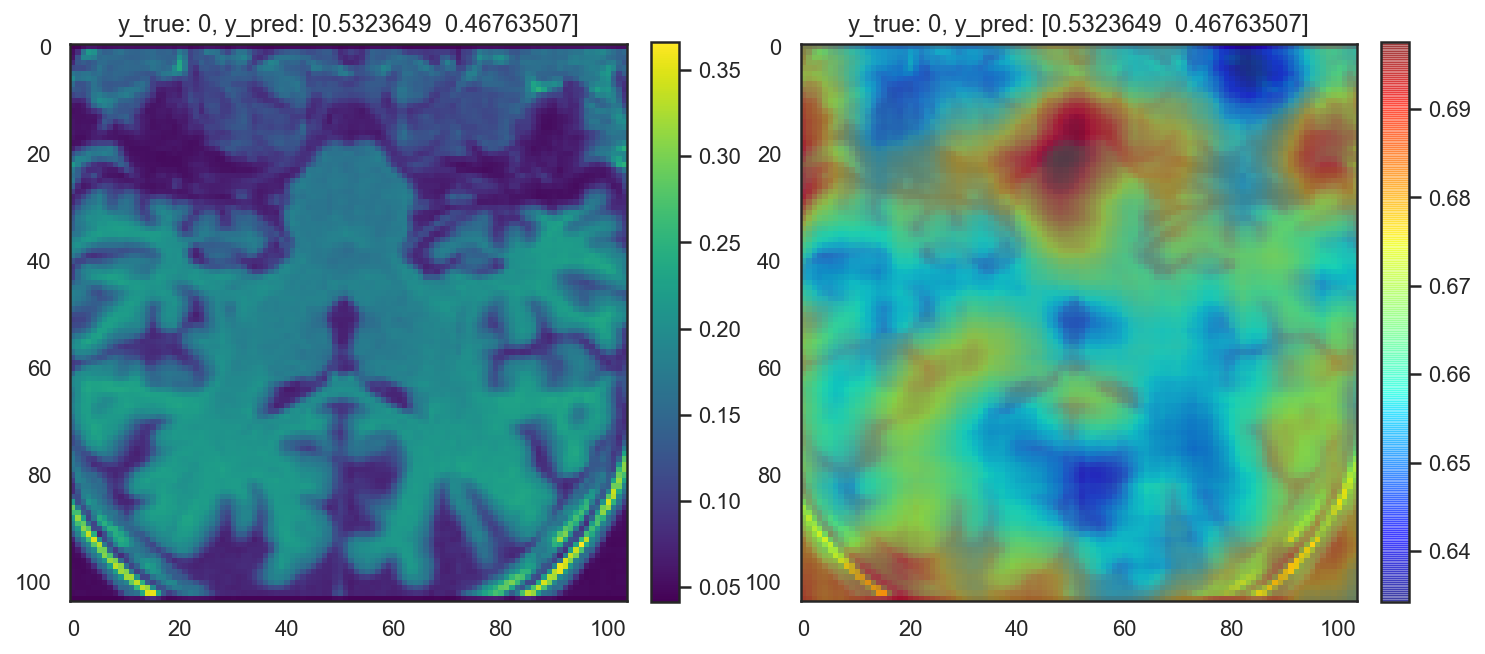

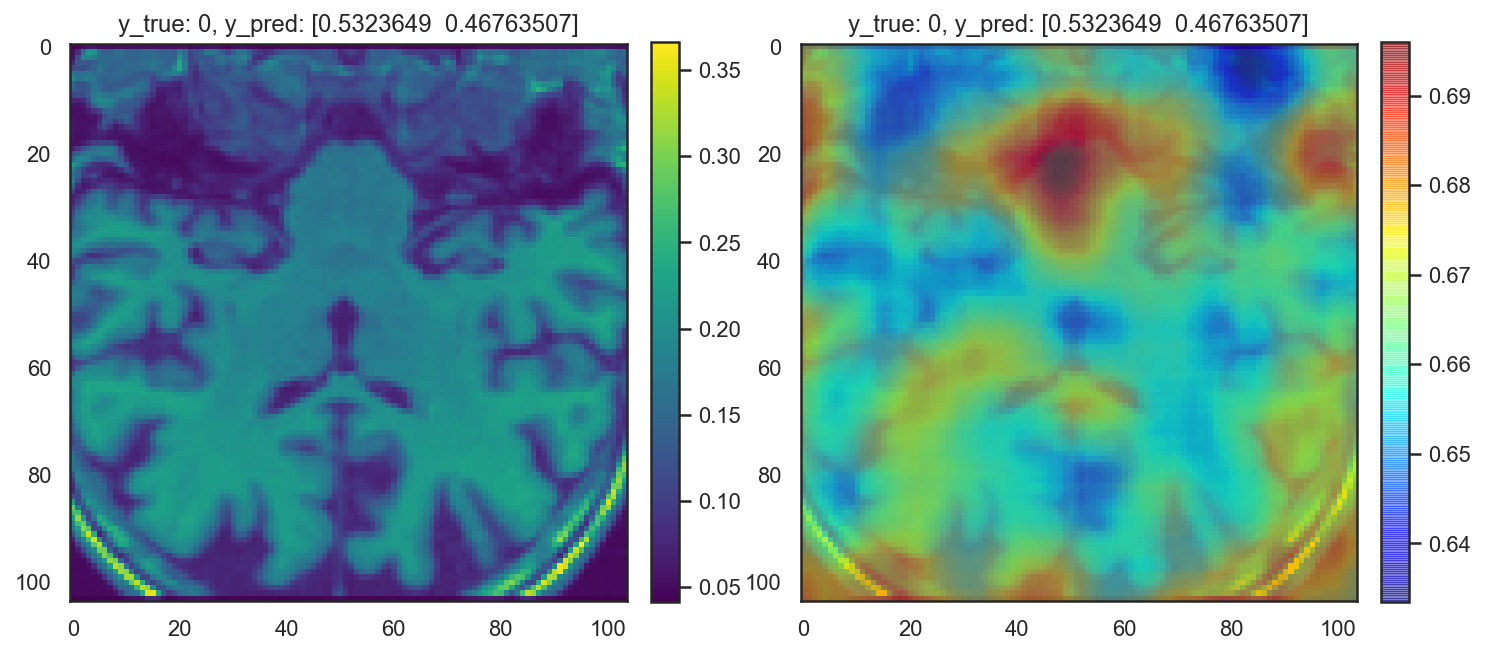

In [37]:
import numpy as np

idx = 0
error = np.sum(np.abs(history_in_paint.arr_heatmap[idx] - history_1.arr_heatmap[idx]))
max_error = np.prod(history_in_paint.arr_heatmap[0].shape)
print('error: ', error)
print('max_error: ', max_error)
print('%', error / max_error)

history_in_paint.plot_heatmap_y(0)
history_1.plot_heatmap_y(0)

In [38]:
import math

idx = 0
error = math.sqrt(np.sum(np.power(history_in_paint.arr_heatmap[idx] - history_1.arr_heatmap[idx], 2)))
max_error = np.prod(history_in_paint.arr_heatmap[0].shape)
print('rmse error: ', error)
print('max_error: ', max_error)
print('%', error / max_error)

rmse error:  3.945994555139216
max_error:  1384448
% 2.850229517568891e-06
